In [10]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from collections import defaultdict
from surprise.model_selection import train_test_split 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score
from surprise.model_selection import cross_validate

In [11]:
#reading files
df_books = pd.read_csv('goodreads_books_poetry.csv')
df_users = pd.read_csv('goodreads_interactions_poetry.csv')

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df_users[['user_id', 'book_id', 'rating']], reader)

### Data Cleaning

In [12]:
#filtering all eng language books
df_books = df_books[df_books['language_code'] == 'eng']

# Extract the unique book_id values from df_books
valid_book_ids = df_books['book_id'].unique()

# Filter the rows in df_users
df_users = df_users[df_users['book_id'].isin(valid_book_ids)]

In [13]:
df_users=df_users[['user_id', 'book_id', 'rating']]

In [14]:
df_users.head()

,user_id,book_id,rating
0,8842281e1d1347389f2ab93d60773d4d,1384,4
1,8842281e1d1347389f2ab93d60773d4d,1376,4
2,8842281e1d1347389f2ab93d60773d4d,30119,5
3,72fb0d0087d28c832f15776b0d936598,24769928,0
4,72fb0d0087d28c832f15776b0d936598,30119,3


In [15]:
df_books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,NaN,1,[],US,eng,"[{'count': '8', 'name': 'to-read'}, {'count': ...",NaN,False,3.83,NaN,...,11.0,NaN,1887.0,https://www.goodreads.com/book/show/16037549-v...,https://images.gr-assets.com/books/1348176637m...,16037549,3,5212748,Vision of Sir Launfal and Other Poems,Vision of Sir Launfal and Other Poems
4,1942004192,4,[],US,eng,"[{'count': '228', 'name': 'to-read'}, {'count'...",NaN,False,5.00,NaN,...,12.0,First,2015.0,https://www.goodreads.com/book/show/29065952-l...,https://images.gr-assets.com/books/1455198396m...,29065952,9,49294781,Louder Than Everything You Love,Louder Than Everything You Love
6,NaN,3,[],US,eng,"[{'count': '5', 'name': 'to-read'}, {'count': ...",NaN,False,4.75,NaN,...,NaN,NaN,2009.0,https://www.goodreads.com/book/show/15861988-i...,https://images.gr-assets.com/books/1346225281m...,15861988,8,21611807,Into Temptation,Into Temptation
10,0692265295,10,[],US,eng,"[{'count': '853', 'name': 'to-read'}, {'count'...",NaN,False,3.95,B00SM9ITQS,...,1.0,NaN,2015.0,https://www.goodreads.com/book/show/24849837-n...,https://images.gr-assets.com/books/1423580531m...,24849837,27,44304270,Naked Soul: The Erotic Love Poems,Naked Soul: The Erotic Love Poems
17,NaN,1,[],US,eng,"[{'count': '206', 'name': 'to-read'}, {'count'...",NaN,True,4.00,NaN,...,10.0,NaN,2000.0,https://www.goodreads.com/book/show/17729612-t...,https://s.gr-assets.com/assets/nophoto/book/11...,17729612,13,24801816,The More Loving One,The More Loving One


### Hyperparameter Tuning

done
done
done
done
done
done
done


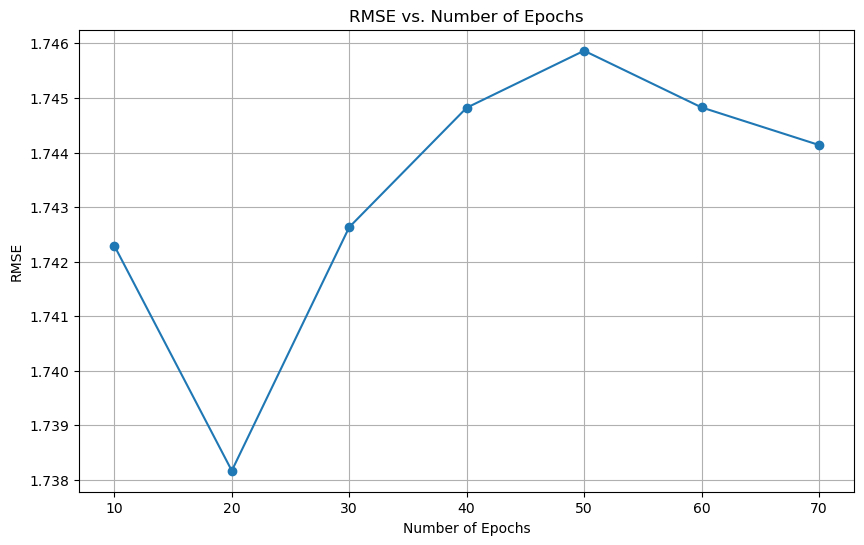

In [16]:
# Initialize lists to store RMSE and epochs
rmse_values = []
epochs = [ 10, 20, 30,40,50,60,70]  # Change the number of epochs as needed

# Perform cross-validation for each epoch value
for n_epochs in epochs:
    svd_model = SVD(n_epochs=n_epochs)
    results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values.append(results['test_rmse'].mean())
    print("done")

# Plot RMSE vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, rmse_values, marker='o')
plt.title('RMSE vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

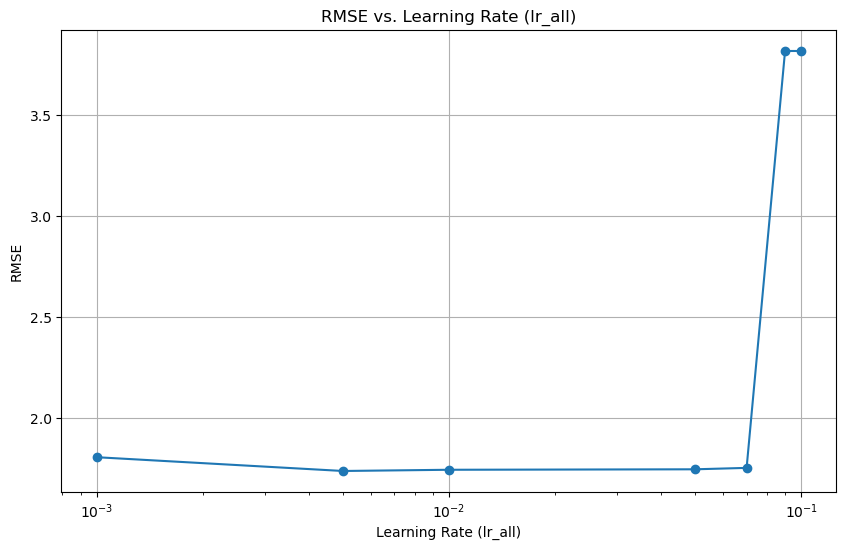

In [17]:
# Initialize lists to store RMSE and learning rate values
rmse_values = []
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.07,0.09,0.1]  # Change the learning rates as needed

# Perform cross-validation for each learning rate
for lr_all in learning_rates:
    svd_model = SVD(lr_all=lr_all)
    results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values.append(results['test_rmse'].mean())
    

# Plot RMSE vs. learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, rmse_values, marker='o')
plt.title('RMSE vs. Learning Rate (lr_all)')
plt.xlabel('Learning Rate (lr_all)')
plt.ylabel('RMSE')
plt.xscale('log')  # Use a logarithmic scale for the learning rate
plt.grid(True)
plt.show()

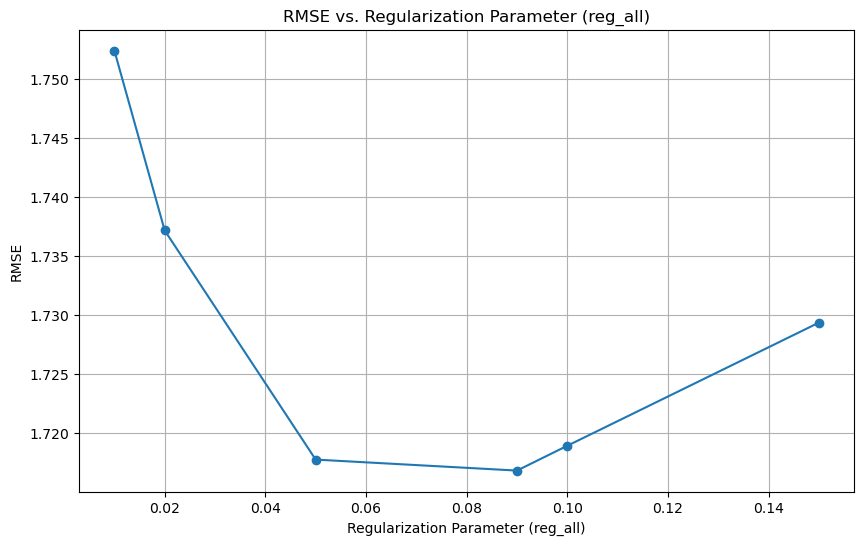

In [18]:
# Initialize lists to store RMSE and regularization parameter values
rmse_values = []
reg_all_values = [0.01, 0.02, 0.05, 0.09, 0.1,0.15]  # Change the regularization parameters as needed

# Perform cross-validation for each regularization parameter
for reg_all in reg_all_values:
    svd_model = SVD(reg_all=reg_all)
    results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values.append(results['test_rmse'].mean())
    

# Plot RMSE vs. regularization parameter
plt.figure(figsize=(10, 6))
plt.plot(reg_all_values, rmse_values, marker='o')
plt.title('RMSE vs. Regularization Parameter (reg_all)')
plt.xlabel('Regularization Parameter (reg_all)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

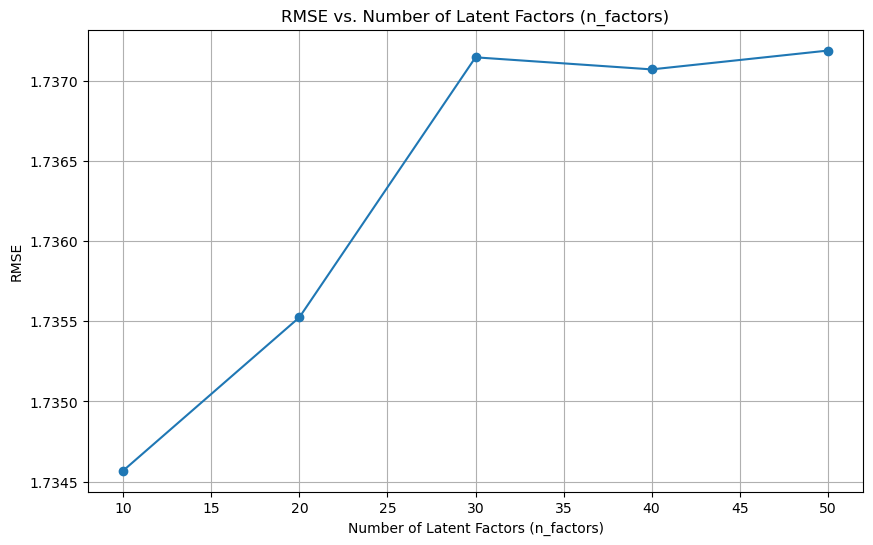

In [19]:
# Initialize lists to store RMSE and n_factors values
rmse_values = []
n_factors_list = [10, 20, 30, 40, 50]  # Change the number of latent factors as needed

# Perform cross-validation for each n_factors value
for n_factors in n_factors_list:
    svd_model = SVD(n_factors=n_factors)
    results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values.append(results['test_rmse'].mean())
    

# Plot RMSE vs. n_factors
plt.figure(figsize=(10, 6))
plt.plot(n_factors_list, rmse_values, marker='o')
plt.title('RMSE vs. Number of Latent Factors (n_factors)')
plt.xlabel('Number of Latent Factors (n_factors)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [21]:
#splitting data into train and test sets
train_split, test_split = train_test_split(df_users, test_size = 0.25, random_state = 20)
print("Training data size:", train_split.shape)
print("Test data size:", test_split.shape)


Training data size: (1014663, 3)
Test data size: (338221, 3)


In [22]:
#reader for parsing the ratings file
reader = Reader(rating_scale=(1, 5))
#building the train and test set, loading the data from dataframe 
train_build = Dataset.load_from_df(train_split, reader)
test_build = Dataset.load_from_df(test_split, reader)
trainset = train_build.build_full_trainset()
testset = test_build.build_full_trainset().build_testset() 
print("Test set size:", len(testset))


Test set size: 338221


In [25]:
#model building
#takes in factors, epochs, learning rate and regularization parameter 
model = SVD(n_factors=40,n_epochs=50,lr_all=0.01,reg_all=0.05) 
model.fit(trainset)


In [26]:
#making predictions
predictions = model.test(testset)
#calculating rmse
accuracy.rmse(predictions, verbose = True)




RMSE: 1.7870


1.7870289981343808

In [36]:
#Save all the predicted ratings and convert it to a dataframe 

all_recommendations_list = defaultdict(list)
all_recommendations_df = pd.DataFrame([])
# Create empty lists to collect data for each column
user_list = []
book_id_list = []
predicted_rating_list = []

for uid, iid, true_r, est, _ in predictions:
    all_recommendations_list[uid].append((iid, est))
    user_list.append(uid)
    book_id_list.append(iid)
    predicted_rating_list.append(est)


#for uid, iid, true_r, est, _ in predictions:
    #all_recommendations_list[uid].append((iid, est))
    
# Create a DataFrame using the collected data
all_recommendations_df = pd.DataFrame({'user': user_list, 'book_id': book_id_list, 'predicted_rating': predicted_rating_list})
    #all_recommendations_df = all_recommendations_df.append(pd.DataFrame({'user': uid, 'movieId': iid, 'predicted_rating' : est}, index=[0]), ignore_index=True); 
print(all_recommendations_df.head(5)) 
print(all_recommendations_df.shape)



                               user   book_id  predicted_rating
0  95c25c4181bd7449f1ce2e2dafe7c21e     30119          3.471149
1  091402d81bef94103c1ef99586c4d365     27822          2.331990
2  091402d81bef94103c1ef99586c4d365      1420          2.556365
3  c958665f697b9b750102b28d61680a0b  18263725          2.583674
4  a8e23ebfd310fc499af43ace51b1c894      1715          2.107247
(338221, 3)


In [37]:
#Merging with movies file to get genre, title information for predictions
all_recommendations_df_details = pd.merge(all_recommendations_df,df_books, on='book_id', how='inner') 
print(all_recommendations_df_details.head(5))


                               user  book_id  predicted_rating        isbn  \
0  95c25c4181bd7449f1ce2e2dafe7c21e    30119          3.471149  0060513039   
1  a8e23ebfd310fc499af43ace51b1c894    30119          3.602963  0060513039   
2  a5b0434e1f3179930816fea2b9193b6e    30119          4.020627  0060513039   
3  238dcb73b558f030afd477ed6be48232    30119          4.123134  0060513039   
4  87070937fd0a8f99c7dd0dfceef7ee37    30119          3.089312  0060513039   

   text_reviews_count series country_code language_code  \
0                8950     []           US           eng   
1                8950     []           US           eng   
2                8950     []           US           eng   
3                8950     []           US           eng   
4                8950     []           US           eng   

                                     popular_shelves asin  ...         isbn13  \
0  [{'count': '20447', 'name': 'to-read'}, {'coun...  NaN  ...  9780060513030   
1  [{'count': 

In [38]:
#List of top n recommendations list as per SVD++
def get_top_n_recommendation_list_df(all_recommendations_df_details, n=10):
    top_n_recommendations_df = all_recommendations_df_details.sort_values(['user','predicted_rating'] ,ascending=[True, False])
    return top_n_recommendations_df


In [39]:
top_n_recommendations_df = get_top_n_recommendation_list_df(all_recommendations_df_details, 10) 
print(top_n_recommendations_df.head())


                                    user   book_id  predicted_rating  \
257732  0001085188e302fc6b2568de45a5f56b  32334098          2.433919   
274369  00013344a98d0147eacab88d3e1502ef    138165          4.272058   
191271  00013344a98d0147eacab88d3e1502ef      5932          4.040472   
106610  000192962b87d560f00b06fdcbd71681     30118          3.015844   
83978   000243c8e211fb3f359e4ff45ca899ea     15997          1.000000   

              isbn  text_reviews_count       series country_code  \
257732  144948641X                 221  ['1137480']           US   
274369  0393974979                  19           []           US   
191271  0143039962                 882           []           US   
106610  0060513063                2222           []           US   
83978   0140424393                2098   ['465549']           US   

       language_code                                    popular_shelves asin  \
257732           eng  [{'count': '62826', 'name': 'to-read'}, {'coun...  NaN  

In [40]:
metrics=[]
true_positives_array = []
est_array = []
for rating_threshold in np.arange(0,5.5,0.5):
    truePositives = 0
    trueNegatives = 0
    falseNegatives = 0
    falsePositives = 0
    accuracy =0
    precision =0
    recall =0
    f1_score = 0
    for uid,_, true_r, est, _ in predictions:
        if(true_r >= rating_threshold and est >= rating_threshold):
            truePositives = truePositives + 1 
            true_positives_array.append(true_r) 
            est_array.append(est)
#here
        elif(true_r >= rating_threshold and est<= rating_threshold):
            falseNegatives = falseNegatives + 1 
        elif(true_r <= rating_threshold and est >=rating_threshold):
             falsePositives = falsePositives + 1 
        elif(true_r <= rating_threshold and est<=rating_threshold):
            trueNegatives = trueNegatives + 1 
        if(truePositives > 0):
            accuracy = (truePositives + trueNegatives ) / (truePositives + trueNegatives + falsePositives + falseNegatives)
            precision = truePositives / (truePositives + falsePositives)
            recall = truePositives / (truePositives + falseNegatives) 
            f1_score = 2 * (precision * recall) / (precision + recall)



In [41]:
metrics.append([rating_threshold,truePositives,trueNegatives,falsePositives,falseNegatives,accuracy,precision,recall,f1_score])
metrics_df = pd.DataFrame(metrics)
metrics_df.rename(columns={0:'rating_threshold', 1:'truePositives', 2: 'trueNegatives', 3: 'falsePositives', 4:'falseNegatives', 5: 'Accuracy', 6: 'Precision', 7:'Recall', 8:'F1 Score'},inplace=True)
true_bin_array =[]
for x in true_positives_array:
    if x >= rating_threshold: 
        x=1
    else: 
        x=0
    true_bin_array.append(x)
auc_score =roc_auc_score(true_bin_array,est_array,multi_class='raise',average='macro')
print('AUC Score: ',auc_score)


AUC Score:  0.6872281918237958


In [52]:
#Calculate precision and recall at n
def get_precision_recall_at_n(predictions,topn,rating_threshold): 
    all_actual_predicted_list = defaultdict(list)
    precision = dict()
    recall= dict()
    no_of_relevant_items = 0 
    no_of_recommended_items_at_top_n = 0 
    no_of_relevant_recommended_items_at_top_n = 0  
    for uid, iid, true_r, est, _ in predictions:
        all_actual_predicted_list[uid].append((est, true_r)) 
    for uid, user_ratings in all_actual_predicted_list.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        no_of_relevant_items = sum((true_r >= rating_threshold) for (_, true_r) in user_ratings)
        no_of_recommended_items_at_top_n = sum((est >= rating_threshold) for (est, _) in user_ratings[:topn])
        no_of_relevant_recommended_items_at_top_n = sum(((true_r >= rating_threshold) and (est >= rating_threshold)) for (est, true_r) in user_ratings[:topn])
        precision[uid] = no_of_relevant_recommended_items_at_top_n / no_of_recommended_items_at_top_n if no_of_recommended_items_at_top_n != 0 else 1
        recall[uid] = no_of_relevant_recommended_items_at_top_n / no_of_relevant_items if no_of_relevant_items != 0 else 1
    return precision, recall 

rating_threshold=3 
precision_recall_at_n = [] 
for topn in range(2,20):
    precision, recall = get_precision_recall_at_n(predictions,topn,rating_threshold)
    precision_at_n = sum(prec for prec in precision.values()) / len(precision)

    recall_at_n = sum(rec for rec in recall.values()) / len(recall)
    precision_recall_at_n.append({'topN' : topn, 'Precision' : precision_at_n, 'Recall': recall_at_n})
for n in range(3,9):
    print(precision_recall_at_n[n])
#get user high rated and liked movies
columns_to_merge_on = ['book_id', 'title']
all_book_df_details = pd.merge(df_users,df_books[columns_to_merge_on], on='book_id', how='inner')
all_book_df_details = all_book_df_details.sort_values(['user_id','rating'],ascending=[True, False])
print(all_book_df_details.loc[all_book_df_details['user_id'] == "0001085188e302fc6b2568de45a5f56b"].head(10)) #user 10 top 10 rated movies
#user 10 top 10 movie recommendations list 
print(top_n_recommendations_df.loc[top_n_recommendations_df['user'] == "0001085188e302fc6b2568de45a5f56b"].head(10))

{'topN': 5, 'Precision': 0.9462747902182009, 'Recall': 0.634560377460847}
{'topN': 6, 'Precision': 0.9462458474588912, 'Recall': 0.6353493971957569}
{'topN': 7, 'Precision': 0.9462221338535749, 'Recall': 0.6358322724172871}
{'topN': 8, 'Precision': 0.9461945439858515, 'Recall': 0.636114615051151}
{'topN': 9, 'Precision': 0.9461858540642453, 'Recall': 0.6363108524744839}
{'topN': 10, 'Precision': 0.9461844353015341, 'Recall': 0.6364599486487056}
                                 user_id   book_id  rating  \
7028    0001085188e302fc6b2568de45a5f56b     30119       5   
134334  0001085188e302fc6b2568de45a5f56b     30118       5   
183629  0001085188e302fc6b2568de45a5f56b      1420       0   
790800  0001085188e302fc6b2568de45a5f56b  32334098       0   

                                         title  
7028                   Where the Sidewalk Ends  
134334                    A Light in the Attic  
183629                                  Hamlet  
790800  The Princess Saves Herself in This O